# Predicting March Madness

## Import Libraries

In [127]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline
import random

## Load and review data

In [5]:
df_school = pd.read_csv("./school_records.csv")
df_game = pd.read_csv("./game_records.csv")
df_ps_game = pd.read_csv("./post_season_game_records.csv")

In [6]:
df_ps_game.shape

(441, 7)

In [7]:
df_school.shape

(3125, 21)

In [8]:
df_game.shape

(47038, 6)

In [9]:
df_school.head(75)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2010.0,Air Force,20.387097,10.741935,5.677419,7.096774,27.222685,12.548387,5.000000,1.645161,...,17.645161,57.193548,63.129032,0.443,0.313,0.635,0.323,0.062500,-4.90,3.13
1,2010.0,Akron,25.057143,13.800000,6.714286,13.342857,35.875918,13.514286,6.085714,3.257143,...,19.485714,70.628571,65.514286,0.433,0.339,0.657,0.686,0.750000,2.82,-1.50
2,2010.0,Alabama A&M,22.185185,17.481481,4.000000,13.925926,36.669410,10.666667,9.222222,5.296296,...,20.370370,65.851852,69.666667,0.382,0.291,0.635,0.407,0.444444,-20.19,-13.71
3,2010.0,Alabama-Birmingham,22.441176,16.852941,5.205882,12.352941,36.342561,11.470588,6.558824,2.676471,...,17.970588,66.941176,60.382353,0.422,0.311,0.694,0.735,0.687500,9.46,2.90
4,2010.0,Alabama State,21.516129,15.290323,6.129032,12.903226,35.099896,12.903226,7.354839,4.161290,...,20.451613,64.451613,65.903226,0.404,0.324,0.641,0.516,0.666667,-14.41,-12.02
5,2010.0,Alabama,24.718750,13.593750,5.468750,12.062500,34.810547,13.406250,7.781250,3.968750,...,18.218750,68.500000,64.781250,0.441,0.350,0.707,0.531,0.375000,10.34,6.62
6,2010.0,Albany (NY),22.187500,12.281250,6.062500,12.468750,35.735352,11.875000,5.843750,3.031250,...,18.812500,62.718750,69.125000,0.409,0.332,0.721,0.219,0.125000,-11.94,-5.53
7,2010.0,Alcorn State,21.000000,14.290323,4.354839,11.483871,33.984391,8.677419,6.903226,3.161290,...,21.612903,60.645161,82.000000,0.379,0.309,0.611,0.065,0.111111,-30.36,-9.00
8,2010.0,American,21.967742,12.741935,5.935484,9.806452,35.070760,14.419355,3.516129,2.612903,...,19.032258,62.612903,67.193548,0.425,0.345,0.692,0.355,0.500000,-11.47,-6.89
9,2010.0,Appalachian State,25.783784,15.648649,7.540541,11.108108,38.186267,12.081081,5.432432,2.756757,...,17.621622,74.756757,69.378378,0.476,0.397,0.738,0.649,0.722222,1.80,-2.76


In [10]:
df_game.head(40)

,year,team_1_name,team_1_score,team_2_name,team_2_score,date_string
0,2010,Arkansas-Pine Bluff,61.0,Winthrop,44.0,Mar16
1,2010,Arkansas-Pine Bluff,44.0,Duke,73.0,Mar19
2,2010,Baylor,68.0,Sam Houston State,59.0,Mar18
3,2010,Baylor,76.0,Old Dominion,68.0,Mar20
4,2010,Baylor,72.0,Saint Mary's (CA),49.0,Mar26
5,2010,Baylor,71.0,Duke,78.0,Mar28
6,2010,Brigham Young,99.0,Florida,92.0,Mar18
7,2010,Brigham Young,72.0,Kansas State,84.0,Mar20
8,2010,Butler,77.0,Texas-El Paso,59.0,Mar18
9,2010,Butler,54.0,Murray State,52.0,Mar20


In [11]:
df_school.tail()

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
3120,2018.0,Wright State,25.117647,15.058824,6.852941,10.176471,36.024221,13.264706,6.647059,2.205882,...,15.911765,72.147059,65.705882,0.436,0.342,0.717,0.735,0.777778,0.78,-4.38
3121,2018.0,Wyoming,26.454545,17.666667,9.212121,7.000000,34.575758,15.696970,6.515152,3.939394,...,19.818182,79.787879,78.696970,0.446,0.345,0.738,0.606,0.555556,4.61,3.89
3122,2018.0,Xavier,28.878788,18.696970,7.818182,9.757576,38.098255,16.636364,5.848485,2.939394,...,16.909091,84.272727,74.484848,0.491,0.369,0.790,0.848,0.833333,19.69,9.90
3123,2018.0,Yale,27.000000,12.933333,8.233333,8.933333,33.868889,16.700000,6.433333,3.033333,...,17.633333,75.166667,73.600000,0.468,0.335,0.721,0.533,0.642857,-3.37,-2.75
3124,2018.0,Youngstown State,28.187500,11.593750,7.343750,14.281250,35.772461,13.906250,8.312500,3.937500,...,21.000000,75.312500,82.718750,0.427,0.330,0.636,0.250,0.333333,-13.66,-2.56


## Check for null values

In [12]:
df_school.isnull().values.any()

False

In [13]:
df_game.isnull().values.any()

False

In [14]:
df_school[(df_school['year'] == 2011) & (df_school['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
334,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


In [88]:
def resolve_team_name(team_name):
    #Apply hard-coded corrections to team names
    team_name_dict = {'Colorado-Colorado Springs':'Colorado',
                     'Colorado College': 'Colorado',
                     'UNC':'North Carolina',
                     'UConn':'Connecticut',
                     'LIU-Brooklyn':'Long Island University',
                     'UTSA':'Texas-San Antonio',
                     'Pitt':'Pittsburgh',
                     'BYU':'Brigham Young',
                     "St. Peter's": "Saint Peter's",
                     'VCU':'Virginia Commonwealth',
                     'Southern Miss':'Southern Mississippi',
                     'Detroit': 'Detroit Mercy',
                     'UNLV':'Nevada-Las Vegas',
                     'Ole Miss':'Mississippi',
                     "St. Joseph's":"Saint Joseph's",
                     'UCSB':'UC-Santa Barbara',
                     'SMU': 'Southern Methodist',
                     'USC':'South Carolina',
                     'LSU':'Louisiana State',
                     'UMass':'Massachusetts',
                     'ETSU':'East Tennessee State'}
    # TODO: for V2 add more corrections to the team_name_dict
    if(team_name in team_name_dict):
        return team_name_dict[team_name]
    return team_name
def get_school_stats(year, team_name):
    return df_school[(df_school['year'] == year) & (df_school['team_name'] == team_name)]
def get_vals(t_stats_list, key):
    ret = []
    for t_stat in t_stats_list:
        ret.append(t_stat[key].squeeze())
    return ret
def get_team_stats_dict_with_t1_win(t1_stats, t2_stats, t1_wins):
    return {'team_name_1':get_vals(t1_stats,'team_name'),'fg_pg_1':get_vals(t1_stats,'fg_pg'),'ft_pg_1':get_vals(t1_stats,'ft_pg'),
            'three_pt_pg_1':get_vals(t1_stats,'three_pt_pg'),'orb_pg_1':get_vals(t1_stats,'orb_pg'),'drb_pg_1':get_vals(t1_stats,'drb_pg'),
            'ast_pg_1':get_vals(t1_stats,'ast_pg'),'stl_pg_1':get_vals(t1_stats,'stl_pg'),'blk_pg_1':get_vals(t1_stats,'blk_pg'),
            'tov_pg_1':get_vals(t1_stats,'tov_pg'),'pf_pg_1':get_vals(t1_stats,'pf_pg'), 'pt_pg_1':get_vals(t1_stats,'pt_pg'),
            'opnt_pt_pg_1':get_vals(t1_stats,'opnt_pt_pg'),'fg_pct_1':get_vals(t1_stats,'fg_pct'),'three_p_pct_1':get_vals(t1_stats,'three_p_pct'),
            'ft_pct_1':get_vals(t1_stats,'ft_pct'),'wl_pct_1':get_vals(t1_stats,'wl_pct'),'conf_wl_pct_1':get_vals(t1_stats,'conf_wl_pct'),
            'srs_1':get_vals(t1_stats,'srs'),'sos_1':get_vals(t1_stats,'sos'),
            'team_name_2':get_vals(t2_stats,'team_name'),'fg_pg_2':get_vals(t2_stats,'fg_pg'),'ft_pg_2':get_vals(t2_stats,'ft_pg'),
            'three_pt_pg_2':get_vals(t2_stats,'three_pt_pg'),'orb_pg_2':get_vals(t2_stats,'orb_pg'),'drb_pg_2':get_vals(t2_stats,'drb_pg'),
            'ast_pg_2':get_vals(t2_stats,'ast_pg'),'stl_pg_2':get_vals(t2_stats,'stl_pg'),'blk_pg_2':get_vals(t2_stats,'blk_pg'),
            'tov_pg_2':get_vals(t2_stats,'tov_pg'),'pf_pg_2':get_vals(t2_stats,'pf_pg'), 'pt_pg_2':get_vals(t2_stats,'pt_pg'),
            'opnt_pt_pg_2':get_vals(t2_stats,'opnt_pt_pg'),'fg_pct_2':get_vals(t2_stats,'fg_pct'),'three_p_pct_2':get_vals(t2_stats,'three_p_pct'),
            'ft_pct_2':get_vals(t2_stats,'ft_pct'),'wl_pct_2':get_vals(t2_stats,'wl_pct'),'conf_wl_pct_2':get_vals(t2_stats,'conf_wl_pct'),
            'srs_2':get_vals(t2_stats,'srs'),'sos_2':get_vals(t2_stats,'sos'),
            't1_win':t1_wins}
def get_team_stats_dict(t1_stats, t2_stats):
    return {'team_name_1':get_vals(t1_stats,'team_name'),'fg_pg_1':get_vals(t1_stats,'fg_pg'),'ft_pg_1':get_vals(t1_stats,'ft_pg'),
            'three_pt_pg_1':get_vals(t1_stats,'three_pt_pg'),'orb_pg_1':get_vals(t1_stats,'orb_pg'),'drb_pg_1':get_vals(t1_stats,'drb_pg'),
            'ast_pg_1':get_vals(t1_stats,'ast_pg'),'stl_pg_1':get_vals(t1_stats,'stl_pg'),'blk_pg_1':get_vals(t1_stats,'blk_pg'),
            'tov_pg_1':get_vals(t1_stats,'tov_pg'),'pf_pg_1':get_vals(t1_stats,'pf_pg'), 'pt_pg_1':get_vals(t1_stats,'pt_pg'),
            'opnt_pt_pg_1':get_vals(t1_stats,'opnt_pt_pg'),'fg_pct_1':get_vals(t1_stats,'fg_pct'),'three_p_pct_1':get_vals(t1_stats,'three_p_pct'),
            'ft_pct_1':get_vals(t1_stats,'ft_pct'),'wl_pct_1':get_vals(t1_stats,'wl_pct'),'conf_wl_pct_1':get_vals(t1_stats,'conf_wl_pct'),
            'srs_1':get_vals(t1_stats,'srs'),'sos_1':get_vals(t1_stats,'sos'),
            'team_name_2':get_vals(t2_stats,'team_name'),'fg_pg_2':get_vals(t2_stats,'fg_pg'),'ft_pg_2':get_vals(t2_stats,'ft_pg'),
            'three_pt_pg_2':get_vals(t2_stats,'three_pt_pg'),'orb_pg_2':get_vals(t2_stats,'orb_pg'),'drb_pg_2':get_vals(t2_stats,'drb_pg'),
            'ast_pg_2':get_vals(t2_stats,'ast_pg'),'stl_pg_2':get_vals(t2_stats,'stl_pg'),'blk_pg_2':get_vals(t2_stats,'blk_pg'),
            'tov_pg_2':get_vals(t2_stats,'tov_pg'),'pf_pg_2':get_vals(t2_stats,'pf_pg'), 'pt_pg_2':get_vals(t2_stats,'pt_pg'),
            'opnt_pt_pg_2':get_vals(t2_stats,'opnt_pt_pg'),'fg_pct_2':get_vals(t2_stats,'fg_pct'),'three_p_pct_2':get_vals(t2_stats,'three_p_pct'),
            'ft_pct_2':get_vals(t2_stats,'ft_pct'),'wl_pct_2':get_vals(t2_stats,'wl_pct'),'conf_wl_pct_2':get_vals(t2_stats,'conf_wl_pct'),
            'srs_2':get_vals(t2_stats,'srs'),'sos_2':get_vals(t2_stats,'sos')}
def get_team_stats_dict_ps(t1_stats, t2_stats, t1_seeds, t2_seeds):
    return {'team_name_1':get_vals(t1_stats,'team_name'),'fg_pg_1':get_vals(t1_stats,'fg_pg'),'ft_pg_1':get_vals(t1_stats,'ft_pg'),
            'three_pt_pg_1':get_vals(t1_stats,'three_pt_pg'),'orb_pg_1':get_vals(t1_stats,'orb_pg'),'drb_pg_1':get_vals(t1_stats,'drb_pg'),
            'ast_pg_1':get_vals(t1_stats,'ast_pg'),'stl_pg_1':get_vals(t1_stats,'stl_pg'),'blk_pg_1':get_vals(t1_stats,'blk_pg'),
            'tov_pg_1':get_vals(t1_stats,'tov_pg'),'pf_pg_1':get_vals(t1_stats,'pf_pg'), 'pt_pg_1':get_vals(t1_stats,'pt_pg'),
            'opnt_pt_pg_1':get_vals(t1_stats,'opnt_pt_pg'),'fg_pct_1':get_vals(t1_stats,'fg_pct'),'three_p_pct_1':get_vals(t1_stats,'three_p_pct'),
            'ft_pct_1':get_vals(t1_stats,'ft_pct'),'wl_pct_1':get_vals(t1_stats,'wl_pct'),'conf_wl_pct_1':get_vals(t1_stats,'conf_wl_pct'),
            'srs_1':get_vals(t1_stats,'srs'),'sos_1':get_vals(t1_stats,'sos'),
            'team_name_2':get_vals(t2_stats,'team_name'),'fg_pg_2':get_vals(t2_stats,'fg_pg'),'ft_pg_2':get_vals(t2_stats,'ft_pg'),
            'three_pt_pg_2':get_vals(t2_stats,'three_pt_pg'),'orb_pg_2':get_vals(t2_stats,'orb_pg'),'drb_pg_2':get_vals(t2_stats,'drb_pg'),
            'ast_pg_2':get_vals(t2_stats,'ast_pg'),'stl_pg_2':get_vals(t2_stats,'stl_pg'),'blk_pg_2':get_vals(t2_stats,'blk_pg'),
            'tov_pg_2':get_vals(t2_stats,'tov_pg'),'pf_pg_2':get_vals(t2_stats,'pf_pg'), 'pt_pg_2':get_vals(t2_stats,'pt_pg'),
            'opnt_pt_pg_2':get_vals(t2_stats,'opnt_pt_pg'),'fg_pct_2':get_vals(t2_stats,'fg_pct'),'three_p_pct_2':get_vals(t2_stats,'three_p_pct'),
            'ft_pct_2':get_vals(t2_stats,'ft_pct'),'wl_pct_2':get_vals(t2_stats,'wl_pct'),'conf_wl_pct_2':get_vals(t2_stats,'conf_wl_pct'),
            'srs_2':get_vals(t2_stats,'srs'),'sos_2':get_vals(t2_stats,'sos'), 'team_1_seed':t1_seeds,
            'team_2_seed':t2_seeds}
def create_team_stats_df_w_t1_win(indeces_w_stats, t1_stats_list, t2_stats_list,t1_wins):
    #Assumes all lists are of the same length
    return pd.DataFrame(get_team_stats_dict_with_t1_win(t1_stats_list, t2_stats_list,t1_wins), index = indeces_w_stats)
def create_team_stats_df(indeces_w_stats, t1_stats_list, t2_stats_list):
    #Assumes all lists are of the same length
    return pd.DataFrame(get_team_stats_dict(t1_stats_list, t2_stats_list), index = indeces_w_stats)
def create_team_stats_df_ps(indeces_w_stats, t1_stats_list, t2_stats_list, t1_seeds, t2_seeds):
        #Assumes all lists are of the same length
    return pd.DataFrame(get_team_stats_dict_ps(t1_stats_list, t2_stats_list, t1_seeds, t2_seeds), index = indeces_w_stats)

In [27]:
def get_team_stats_df(game_df, should_print=False):
    indeces_w_stats = []
    t1_stats_list = []
    t2_stats_list = []
    t1_wins_list = []
    for index, row in game_df.iterrows():
        year = row['year']
        team_1 = row['team_1_name']
        team_2 = row['team_2_name']
        team_1_score = row['team_1_score']
        team_2_score = row['team_2_score']
        t1_stats = get_school_stats(year, resolve_team_name(team_1))
        t2_stats = get_school_stats(year, resolve_team_name(team_2))

        if(len(t1_stats) > 0 and len(t2_stats) > 0):  
            indeces_w_stats.append(index)
            t1_stats_list.append(t1_stats)
            t2_stats_list.append(t2_stats)
            t1_wins_list.append(team_1_score > team_2_score)
        else:         
            if(should_print):
                print(year)
                if(len(t1_stats) < 1):
                    print(team_1)
                if(len(t2_stats) < 1):
                    print(team_2)
            
    print(len(indeces_w_stats))
    team_stats_df = create_team_stats_df_w_t1_win(indeces_w_stats, t1_stats_list, t2_stats_list, t1_wins_list)
    return team_stats_df
        

In [29]:
team_stats_df = get_team_stats_df(df_game)

43291


In [28]:
ps_team_stats_df = get_team_stats_df(df_ps_game, True)

441


In [31]:
team_stats_df.head(10)

,ast_pg_1,ast_pg_2,blk_pg_1,blk_pg_2,conf_wl_pct_1,conf_wl_pct_2,drb_pg_1,drb_pg_2,fg_pct_1,fg_pct_2,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
0,12.382353,10.484848,3.558824,4.090909,0.777778,0.666667,37.458478,38.253444,0.408,0.380,...,Arkansas-Pine Bluff,Winthrop,0.303,0.248,4.147059,3.757576,16.735294,12.181818,0.529,0.576
1,12.382353,13.875000,3.558824,4.050000,0.777778,0.812500,37.458478,38.644375,0.408,0.442,...,Arkansas-Pine Bluff,Duke,0.303,0.385,4.147059,7.525000,16.735294,10.725000,0.529,0.875
2,14.111111,20.393939,6.722222,2.575758,0.687500,0.875000,38.769290,37.411387,0.487,0.463,...,Baylor,Sam Houston State,0.385,0.370,7.083333,8.696970,13.638889,13.393939,0.778,0.758
3,14.111111,15.388889,6.722222,2.916667,0.687500,0.833333,38.769290,38.305556,0.487,0.447,...,Baylor,Old Dominion,0.385,0.317,7.083333,4.611111,13.638889,12.694444,0.778,0.750
4,14.111111,15.970588,6.722222,5.176471,0.687500,0.785714,38.769290,36.268166,0.487,0.484,...,Baylor,Saint Mary's (CA),0.385,0.406,7.083333,8.352941,13.638889,11.588235,0.778,0.824
5,14.111111,13.875000,6.722222,4.050000,0.687500,0.812500,38.769290,38.644375,0.487,0.442,...,Baylor,Duke,0.385,0.385,7.083333,7.525000,13.638889,10.725000,0.778,0.875
6,15.750000,14.088235,3.500000,2.764706,0.812500,0.562500,36.716821,36.812284,0.483,0.444,...,Brigham Young,Florida,0.417,0.313,8.111111,5.970588,11.583333,12.441176,0.833,0.618
7,15.750000,14.621622,3.500000,5.054054,0.812500,0.687500,36.716821,38.429511,0.483,0.450,...,Brigham Young,Kansas State,0.417,0.360,8.111111,6.837838,11.583333,14.297297,0.833,0.784
8,12.210526,14.787879,2.263158,3.636364,1.000000,0.937500,32.413435,35.854913,0.442,0.474,...,Butler,Texas-El Paso,0.342,0.343,6.842105,6.090909,12.000000,13.181818,0.868,0.788
9,12.210526,15.444444,2.263158,5.444444,1.000000,0.944444,32.413435,36.300154,0.442,0.499,...,Butler,Murray State,0.342,0.377,6.842105,6.277778,12.000000,14.638889,0.868,0.861


In [32]:
ps_team_stats_df.head(10)

,ast_pg_1,ast_pg_2,blk_pg_1,blk_pg_2,conf_wl_pct_1,conf_wl_pct_2,drb_pg_1,drb_pg_2,fg_pct_1,fg_pct_2,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
0,12.647059,15.864865,2.235294,3.189189,0.562500,0.888889,34.569204,34.207451,0.429,0.494,...,Texas-San Antonio,Ohio State,0.351,0.423,6.882353,7.702703,13.558824,10.135135,0.588,0.919
1,14.205882,13.636364,3.235294,3.787879,0.888889,0.500000,34.626298,36.691460,0.471,0.438,...,George Mason,Villanova,0.395,0.348,6.676471,6.363636,11.058824,11.878788,0.794,0.636
2,13.088235,14.878788,4.735294,4.121212,0.562500,0.611111,34.285467,36.751148,0.443,0.429,...,Clemson,West Virginia,0.344,0.337,6.382353,6.242424,13.205882,12.030303,0.647,0.636
3,13.343750,12.684211,4.187500,6.289474,0.866667,0.625000,34.223633,37.060249,0.465,0.459,...,Princeton,Kentucky,0.363,0.397,6.031250,7.394737,12.156250,10.684211,0.781,0.763
4,15.513514,13.250000,3.621622,3.062500,0.500000,0.937500,35.585099,34.992188,0.465,0.461,...,Marquette,Xavier,0.349,0.329,5.162162,5.406250,12.297297,12.062500,0.595,0.750
5,12.676471,16.171429,4.264706,6.600000,0.666667,0.666667,34.166090,37.021224,0.429,0.472,...,Indiana State,Syracuse,0.362,0.354,6.911765,6.342857,14.029412,12.371429,0.588,0.771
6,16.942857,15.000000,5.114286,4.909091,0.611111,0.562500,38.658776,37.292929,0.469,0.452,...,Washington,Georgia,0.371,0.342,8.714286,4.727273,12.171429,13.454545,0.686,0.636
7,15.242424,15.486486,3.363636,5.513514,0.888889,0.875000,41.317723,42.265157,0.462,0.451,...,Long Island University,North Carolina,0.361,0.328,6.939394,5.135135,15.303030,13.324324,0.818,0.784
8,15.864865,14.205882,3.189189,3.235294,0.888889,0.888889,34.207451,34.626298,0.494,0.471,...,Ohio State,George Mason,0.423,0.395,7.702703,6.676471,10.135135,11.058824,0.919,0.794
9,12.684211,14.878788,6.289474,4.121212,0.625000,0.611111,37.060249,36.751148,0.459,0.429,...,Kentucky,West Virginia,0.397,0.337,7.394737,6.242424,10.684211,12.030303,0.763,0.636


In [33]:
game_w_team_stats = pd.concat([df_game, team_stats_df], axis=1, join='inner')

In [35]:
ps_game_w_team_stats = pd.concat([df_ps_game, ps_team_stats_df], axis=1, join='inner')

In [36]:
game_w_team_stats.head(4)

,year,team_1_name,team_1_score,team_2_name,team_2_score,date_string,ast_pg_1,ast_pg_2,blk_pg_1,blk_pg_2,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
0,2010,Arkansas-Pine Bluff,61.0,Winthrop,44.0,Mar16,12.382353,10.484848,3.558824,4.090909,...,Arkansas-Pine Bluff,Winthrop,0.303,0.248,4.147059,3.757576,16.735294,12.181818,0.529,0.576
1,2010,Arkansas-Pine Bluff,44.0,Duke,73.0,Mar19,12.382353,13.875000,3.558824,4.050000,...,Arkansas-Pine Bluff,Duke,0.303,0.385,4.147059,7.525000,16.735294,10.725000,0.529,0.875
2,2010,Baylor,68.0,Sam Houston State,59.0,Mar18,14.111111,20.393939,6.722222,2.575758,...,Baylor,Sam Houston State,0.385,0.370,7.083333,8.696970,13.638889,13.393939,0.778,0.758
3,2010,Baylor,76.0,Old Dominion,68.0,Mar20,14.111111,15.388889,6.722222,2.916667,...,Baylor,Old Dominion,0.385,0.317,7.083333,4.611111,13.638889,12.694444,0.778,0.750


In [37]:
ps_game_w_team_stats.head(4)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed,ast_pg_1,ast_pg_2,blk_pg_1,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0,12.647059,15.864865,2.235294,...,Texas-San Antonio,Ohio State,0.351,0.423,6.882353,7.702703,13.558824,10.135135,0.588,0.919
1,2011,George Mason,61.0,8.0,Villanova,57.0,9.0,14.205882,13.636364,3.235294,...,George Mason,Villanova,0.395,0.348,6.676471,6.363636,11.058824,11.878788,0.794,0.636
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0,13.088235,14.878788,4.735294,...,Clemson,West Virginia,0.344,0.337,6.382353,6.242424,13.205882,12.030303,0.647,0.636
3,2011,Princeton,57.0,13.0,Kentucky,59.0,4.0,13.343750,12.684211,4.187500,...,Princeton,Kentucky,0.363,0.397,6.031250,7.394737,12.156250,10.684211,0.781,0.763


In [ ]:
game_w_team_stats.shape

In [ ]:
def plot_corr(df, size=47):
    """
    Function plots graphical correlation matric for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    Displays:
        matrix of correlation between columns. (blue->red)
                                                0----->1
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks
plot_corr(game_w_team_stats)
#TODO manage correlations

In [ ]:
game_w_team_stats.corr()

## Check true/false ratio

In [ ]:
t1_win_map = {True:1, False:0}
game_w_team_stats['t1_win'] = game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(game_w_team_stats.loc[game_w_team_stats['t1_win'] == True])
num_false = len(game_w_team_stats.loc[game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

In [45]:
from sklearn.cross_validation import train_test_split
feature_col_names = ['fg_pg_1','ft_pg_1',
            'three_pt_pg_1','orb_pg_1','drb_pg_1',
            'ast_pg_1','stl_pg_1','blk_pg_1',
            'tov_pg_1','pf_pg_1', 'pt_pg_1',
            'opnt_pt_pg_1','fg_pct_1','three_p_pct_1',
            'ft_pct_1','wl_pct_1','conf_wl_pct_1',
            'srs_1','sos_1',
            'fg_pg_2','ft_pg_2',
            'three_pt_pg_2','orb_pg_2','drb_pg_2',
            'ast_pg_2','stl_pg_2','blk_pg_2',
            'tov_pg_2','pf_pg_2', 'pt_pg_2',
            'opnt_pt_pg_2','fg_pct_2','three_p_pct_2',
            'ft_pct_2','wl_pct_2','conf_wl_pct_2',
            'srs_2','sos_2'
            ]
ps_feature_col_names = ['team_1_seed', 'team_2_seed','fg_pg_1','ft_pg_1',
            'three_pt_pg_1','orb_pg_1','drb_pg_1',
            'ast_pg_1','stl_pg_1','blk_pg_1',
            'tov_pg_1','pf_pg_1', 'pt_pg_1',
            'opnt_pt_pg_1','fg_pct_1','three_p_pct_1',
            'ft_pct_1','wl_pct_1','conf_wl_pct_1',
            'srs_1','sos_1',
            'fg_pg_2','ft_pg_2',
            'three_pt_pg_2','orb_pg_2','drb_pg_2',
            'ast_pg_2','stl_pg_2','blk_pg_2',
            'tov_pg_2','pf_pg_2', 'pt_pg_2',
            'opnt_pt_pg_2','fg_pct_2','three_p_pct_2',
            'ft_pct_2','wl_pct_2','conf_wl_pct_2',
            'srs_2','sos_2'
            ]
predicted_class_names = ['t1_win']
ps_predict_class_names = ['t1_win']
x = game_w_team_stats[feature_col_names].values
y = game_w_team_stats[predicted_class_names].values
ps_x = ps_game_w_team_stats[ps_feature_col_names].values
ps_y = ps_game_w_team_stats[ps_predict_class_names].values
print(type(x), type(y))
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
ps_x_train, ps_x_test, ps_y_train, ps_y_test = train_test_split(ps_x, ps_y, test_size=split_test_size, random_state=42)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [46]:
print("{0:0.2f}% in training set".format((len(x_train)/len(game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(game_w_team_stats.index))*100))
print("{0:0.2f}% in training set".format((len(ps_x_train)/len(ps_game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(ps_x_test)/len(ps_game_w_team_stats.index))*100))

70.00% in training set
30.00% in test set
69.84% in training set
30.16% in test set


## Impute with the mean

In [48]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)
ps_x_train = fill_0.fit_transform(ps_x_train)
ps_x_test = fill_0.fit_transform(ps_x_test)
# TODO : impute incorrect negative values

## Training Initial Algorith - Naive Bayes


In [49]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())
ps_nb_model = GaussianNB()
ps_nb_model.fit(ps_x_train, ps_y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [50]:
nb_predict_test = nb_model.predict(x_test)
ps_nb_predict_test = ps_nb_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_nb_predict_test)))

Accuracy: 0.7234
Accuracy: 0.7594


### Metrics

In [51]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1, 0]))
print("Ps - Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(ps_y_test, ps_nb_predict_test, labels=[1, 0])))
print("")

print("PS -Classification Report")
print(metrics.classification_report(ps_y_test, ps_nb_predict_test, labels=[1, 0]))

Confusion Matrix
[[4486 1729]
 [1864 4909]]

Classification Report
             precision    recall  f1-score   support

          1       0.71      0.72      0.71      6215
          0       0.74      0.72      0.73      6773

avg / total       0.72      0.72      0.72     12988

Ps - Confusion Matrix
[[49 15]
 [17 52]]

PS -Classification Report
             precision    recall  f1-score   support

          1       0.74      0.77      0.75        64
          0       0.78      0.75      0.76        69

avg / total       0.76      0.76      0.76       133



## Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())
ps_rf_model = RandomForestClassifier(random_state=42)
ps_rf_model.fit(ps_x_train, ps_y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
rf_predict_test = rf_model.predict(x_test)
ps_rf_predict_test = ps_rf_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test))) # Will be low because of over-fitting
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.6883
Accuracy: 0.6917


## Let us improve the accurracy using logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())
ps_lr_model = LogisticRegression(C=0.7, random_state=42)
ps_lr_model.fit(ps_x_train, ps_y_train.ravel())
lr_predict_test = lr_model.predict(x_test)
ps_lr_predict_test = ps_lr_model.predict(ps_x_test)


In [58]:
# training metrics
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
# training metrics
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_predict_test)))
print(metrics.confusion_matrix(ps_y_test, ps_lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(ps_y_test, ps_lr_predict_test, labels=[1,0]))

Accuracy: {0:.4f} 0.7596242685555897
[[4653 1562]
 [1560 5213]]

Classification Report
             precision    recall  f1-score   support

          1       0.75      0.75      0.75      6215
          0       0.77      0.77      0.77      6773

avg / total       0.76      0.76      0.76     12988

Accuracy: {0:.4f} 0.7293233082706767
[[43 21]
 [15 54]]

Classification Report
             precision    recall  f1-score   support

          1       0.74      0.67      0.70        64
          0       0.72      0.78      0.75        69

avg / total       0.73      0.73      0.73       133



## Setting regularization parameters

In [59]:
def get_best_score_C_val_for_LR(x_tr, y_tr, x_tst, y_tst):
    C_start = 0.1
    C_end = 5
    C_inc = 0.1
    C_values, recall_scores = [], []
    C_val = C_start
    best_recall_score = 0

    while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val, random_state=42)
        lr_model_loop.fit(x_tr, y_tr.ravel())
        lr_predict_loop_test = lr_model_loop.predict(x_tst)
        recall_score = metrics.recall_score(y_tst, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
        C_val = C_val + C_inc
    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
    %matplotlib inline
    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")
    return best_score_C_val

1st max valu of 0.749 occured at C=0.800


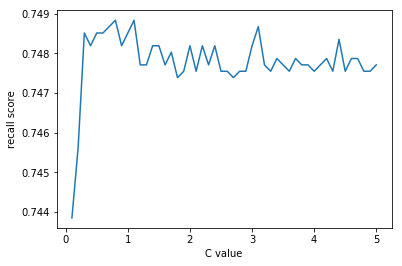

In [60]:
best_score_C_val = get_best_score_C_val_for_LR(x_train, y_train, x_test, y_test)

1st max valu of 0.703 occured at C=0.100


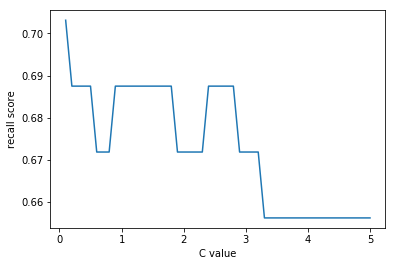

In [62]:
ps_best_score_C_val = get_best_score_C_val_for_LR(ps_x_train, ps_y_train, ps_x_test, ps_y_test)

In [64]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)


print("Accuracy: {0:.4f}",format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))
# Post Season
ps_lr_model = LogisticRegression(class_weight="balanced", C=ps_best_score_C_val, random_state=42)
ps_lr_model.fit(ps_x_train, ps_y_train.ravel())
ps_lr_predict_test = ps_lr_model.predict(ps_x_test)


print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_predict_test)))
print(metrics.confusion_matrix(ps_y_test, ps_lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(ps_y_test, ps_lr_predict_test, labels=[1,0]))
print(metrics.recall_score(ps_y_test, ps_lr_predict_test))

Accuracy: {0:.4f} 0.7601632275947028
[[4763 1452]
 [1663 5110]]

Classification Report
             precision    recall  f1-score   support

          1       0.74      0.77      0.75      6215
          0       0.78      0.75      0.77      6773

avg / total       0.76      0.76      0.76     12988

0.766371681416
Accuracy: {0:.4f} 0.7368421052631579
[[41 23]
 [12 57]]

Classification Report
             precision    recall  f1-score   support

          1       0.77      0.64      0.70        64
          0       0.71      0.83      0.77        69

avg / total       0.74      0.74      0.73       133

0.640625


## Logistic Regression CV (Cross Validation)

In [65]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
lr_cv_model.fit(x_train, y_train.ravel())
ps_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
ps_lr_cv_model.fit(ps_x_train, ps_y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [67]:
lr_cv_predict_test = lr_cv_model.predict(x_test)
ps_lr_cv_predict_test = ps_lr_cv_model.predict(ps_x_test)
# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

print("Accuracy {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_lr_cv_predict_test)))
print(metrics.confusion_matrix(ps_y_test, ps_lr_cv_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(ps_y_test, ps_lr_cv_predict_test, labels=[1,0]))

Accuracy 0.7552
[[4727 1488]
 [1691 5082]]

Classification Report
             precision    recall  f1-score   support

          1       0.74      0.76      0.75      6215
          0       0.77      0.75      0.76      6773

avg / total       0.76      0.76      0.76     12988

Accuracy 0.7293
[[40 24]
 [12 57]]

Classification Report
             precision    recall  f1-score   support

          1       0.77      0.62      0.69        64
          0       0.70      0.83      0.76        69

avg / total       0.74      0.73      0.73       133



In [ ]:
df_school[df_school['year'] == 2018]

In [70]:
school_names_south = [
    # south region
    ('Virginia', 1),('Maryland-Baltimore County', 16),
    ('Creighton', 8), ('Kansas State', 9),
    ('Kentucky',5), ('Davidson', 12),
    ('Arizona',4), ('Buffalo', 13),
    ('Miami (FL)', 6), ('Loyola (IL)', 11),
    ('Tennessee',3), ('Wright State',14),
    ('Nevada',7),('Texas',10),
    ('Cincinnati',2), ('Georgia State',15)
    ]
school_names_west = [
    # west region
    ('Xavier', 1),('North Carolina Central',16), #or 'Texas Southern',
    ('Missouri', 8),('Florida State', 9),
    ('Ohio State',5), ('South Dakota State', 12),
    ('Gonzaga',4), ('North Carolina-Greensboro',13),
    ('Houston',6),('San Diego State',11),
    ('Michigan', 3),('Montana', 14),
    ('Texas A&M',7),('Providence',10),
    ('North Carolina',2),('Lipscomb',15)
    ]
school_names_east = [
    # east region
    ('Villanova',1),('Long Island University',16), # or 'Radford',
    ('Virginia Tech',8), ('Alabama',9),
    ('West Virginia',5), ('Murray State',12),
    ('Wichita State',4), ('Marshall',13),
    ('Florida',6), ('St. Bonaventure',11), # or 'UCLA',
    ('Texas Tech',3), ('Stephen F. Austin',14),
    ('Arkansas',7), ('Butler',10),
    ('Purdue', 2), ('Cal State Fullerton',15)
    ]
school_names_midwest = [
    # mid-west region
    ('Kansas', 1), ('Pennsylvania',16),
    ('Seton Hall', 8), ('North Carolina State',9),
    ('Clemson', 5), ('New Mexico State',12),
    ('Auburn',4), ('College of Charleston',13),
    ('Texas Christian',6), ('Arizona State',11), # or 'Syracuse',
    ('Michigan State',3), ('Bucknell',14),
    ('Rhode Island',7), ('Oklahoma',10),
    ('Duke', 2), ('Iona' ,15) 
    ]


In [159]:
def get_matchups_stats(schools, post_season):    
    
    i = 0 
    t1_stats = []
    t2_stats = []
    t1_seeds = []
    t2_seeds = []
    if(not is_power_of_two(len(schools))):
        print('ERROR: invalid number of school names')
        return False
    while i < len(schools):
        t1_name, t1_seed = schools[i]
        t2_name, t2_seed = schools[i + 1]
        t1_seeds.append(t1_seed)
        t2_seeds.append(t2_seed)
        #print(t1_name, t2_name
        t1_stats.append(get_school_stats(2018, t1_name))
        t2_stats.append(get_school_stats(2018, t2_name))
        i = i + 2
    if(post_season):
        matchup_stats = create_team_stats_df_ps(range(0,int(len(schools)/2)), t1_stats, t2_stats, t1_seeds, t2_seeds)
    else:
        matchup_stats = create_team_stats_df(range(0,int(len(schools)/2)), t1_stats, t2_stats)
    return matchup_stats
def is_power_of_two(num):
    return ((num & (num - 1)) == 0) and num != 0
def get_matchup_winners(matchup_stats, schools, model, post_season):
    if(post_season):
        x_tourney = matchup_stats[ps_feature_col_names].values
    else:
        x_tourney = matchup_stats[feature_col_names].values
    y_tourney = model.predict(x_tourney)
    i = 0
    winners = []
    for y_val in y_tourney:
        t1_name, t1_seed = schools[i]
        t2_name, t2_seed = schools[i + 1]
        print(t1_name,t1_seed,' vs. ', t2_name,t2_seed,'(team 1 won=', y_val,')')
        if(y_val):
            winners.append((t1_name,t1_seed))
        else:
            winners.append((t2_name, t2_seed))
        i = i + 2
    return winners
def evaluate_winner(schools,sub_bracket_name ):        
    remaining_teams = schools
    i = 1
    while(len(remaining_teams) > 1):
        #Add a random factor
        rand = random.randrange(0,1)

        model = ps_lr_model
        post_season_stats = True
        print("---",sub_bracket_name," round ",i,"---")
        matchup_stats = get_matchups_stats(remaining_teams, post_season_stats)
        remaining_teams = get_matchup_winners(matchup_stats,remaining_teams, model, post_season_stats)
        i = i + 1
    winner = remaining_teams[0]
    print('Winner of ',sub_bracket_name,':',winner)
    return winner


In [160]:
final_four = [evaluate_winner(school_names_south, "South"), evaluate_winner(school_names_west,"West"),
              evaluate_winner(school_names_east, "East"), evaluate_winner(school_names_midwest, "MidWest")]


--- South  round  1 ---
Virginia 1  vs.  Maryland-Baltimore County 16 (team 1 won= True )
Creighton 8  vs.  Kansas State 9 (team 1 won= True )
Kentucky 5  vs.  Davidson 12 (team 1 won= True )
Arizona 4  vs.  Buffalo 13 (team 1 won= True )
Miami (FL) 6  vs.  Loyola (IL) 11 (team 1 won= True )
Tennessee 3  vs.  Wright State 14 (team 1 won= True )
Nevada 7  vs.  Texas 10 (team 1 won= False )
Cincinnati 2  vs.  Georgia State 15 (team 1 won= True )
--- South  round  2 ---
Virginia 1  vs.  Creighton 8 (team 1 won= True )
Kentucky 5  vs.  Arizona 4 (team 1 won= True )
Miami (FL) 6  vs.  Tennessee 3 (team 1 won= True )
Texas 10  vs.  Cincinnati 2 (team 1 won= False )
--- South  round  3 ---
Virginia 1  vs.  Kentucky 5 (team 1 won= True )
Miami (FL) 6  vs.  Cincinnati 2 (team 1 won= False )
--- South  round  4 ---
Virginia 1  vs.  Cincinnati 2 (team 1 won= True )
Winner of  South : ('Virginia', 1)
--- West  round  1 ---
Xavier 1  vs.  North Carolina Central 16 (team 1 won= True )
Missouri 8  vs

In [161]:
final_four

[('Virginia', 1), ('North Carolina', 2), ('Villanova', 1), ('Duke', 2)]

In [162]:
champ = evaluate_winner(final_four, "FinalFour")

--- FinalFour  round  1 ---
Virginia 1  vs.  North Carolina 2 (team 1 won= True )
Villanova 1  vs.  Duke 2 (team 1 won= True )
--- FinalFour  round  2 ---
Virginia 1  vs.  Villanova 1 (team 1 won= True )
Winner of  FinalFour : ('Virginia', 1)
